## Лабораторная работа №5

## Вариант 25

Имеется одноканальная СМО с очередью, ограниченной числом мест R = 2. На вход СМО поступает простейший по ток заявок с интенсивностью X. Время обслуживания распределено по обобщенному закону Эрланга с параметрами k, X2. Найти вероятности состояний СМО и характеристики эффективности СМО.

Так как время обслуживания распределено по обобщенному закону Эрланга с параметрами $ k, X_{2} $ Воспользуемся методом фаз для решения задачи. Представим, что обслуживание состоит из 2-х фаз, 1 и 2. Каждая фаза продолжается 
$ t_{1}, t_{2} $ соответственно, а полное время обслуживания 
$ t_{o} = t_{1} + t_{2} $, $ t_{1} $ и $ t_{2}$ имеют показательное распределение с параметрами $ k $ и $ X_{2} $ соответственно, 
$ t_{o} $ - распределение Эрланга с параметрами 
$ k $ и $ X_{2} $

Возможные состояния системы:  
$ \Large s_{0} $ - ни один канал не занят;  
$ \Large s_{11} $ - В СМО 1 заявка, обслуживается в 1-й фазе, очереди нет;  
$ \Large s_{12} $ - 1 заявка, 2-я фаза, очереди нет;  
$ \Large s_{21} $ - 2 заявки, 1 обслуживается, вторая в очереди, 1-я фаза;  
$ \Large s_{22} $ - 2 заявки, 1 обслуживается, вторая в очереди, 2-я фаза;  
$ \Large s_{31} $ - 3 заявка, 1 обслуживается, две в очереди, 1-я фаза;  
$ \Large s_{32} $ - 3 заявка, 1 обслуживается, две в очереди, 2-я фаза;  

#### Граф состояний СМО:

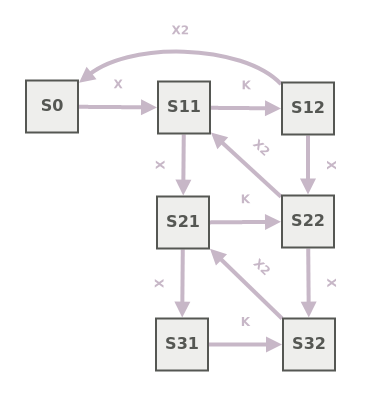

Составим уравнение для финальльных вероятностей. Будем пользоваться правилом, что дя каждого состояния систеты суммарный выходной поток равен суммарному входному потоку. 

$ \Large X p_{0} = X_{2} p_{12} $   
$ \Large (X + k) p_{11} = X p_{0} + X_{2} p_{22} $   
$ \Large (X + X_{2}) p_{12} = k p_{11} $  
$ \Large (X + k) p_{21} = X p_{11} + X_{2} p_{32} $  
$ \Large (X + X_{2}) p_{22} = X p_{12} + k p_{21} $   
$ \Large k p_{31} = X p_{21} $  
$ \Large X_{2} p_{32} = X p_{22} + k p_{31} $  

Добавим условие нормировки:  
$ \Large p_{0} + p_{11} + p_{12} + p_{21} + p_{22} + p_{31} + p_{32} = 1 $ 

Решив систему, получим следующее:  

$ \Large p_{0} = \bigg(1 + \frac{(X + X_{2}) X}{k X_{2}} + \frac{X}{X_{2}} +  \frac{X^3(X + k + X_{2}) + X^2 X_{2} (X + X_{2})}{k^2 X_{2}^2} + \frac{X^2(X + k + X_{2})}{k X_{2}^2} + \frac{X^4(X + k + X_{2}) + X^3 X_{2} (X + X_{2})}{k^3 X_{2}^2} + \frac{X^4(X + k + X_{2}) + X^3 X_{2} (X + X_{2})}{k^2 X_{2}^3} + \frac{X^3(X + k + X_{2})}{k X_{2}^3} \bigg)^{-1} $  
$ \Large p_{11} = \frac{(X + X_{2}) X}{k X_{2}} p_{0} $  
$ \Large p_{12} = \frac{X}{X_{2}} p_{0} $  
$ \Large p_{21} = \frac{X^3(X + k + X_{2}) + X^2 X_{2} (X + X_{2})}{k^2 X_{2}^2} p_{0} $  
$ \Large p_{22} = \frac{X^2(X + k + X_{2})}{k X_{2}^2} p_{0} $  
$ \Large p_{31} = \frac{X^4(X + k + X_{2}) + X^3 X_{2} (X + X_{2})}{k^3 X_{2}^2} p_{0} $  
$ \Large p_{32} = \bigg(\frac{X^4(X + k + X_{2}) + X^3 X_{2} (X + X_{2})}{k^2 X_{2}^3} + \frac{X^3(X + k + X_{2})}{k X_{2}^3} \bigg) p_{0} $  

Теперь найдем финальные вероятности состояний системы:

$ \Large p_{1} = p_{11} + p_{12} $  
$ \Large p_{2} = p_{21} + p_{22} $  
$ \Large p_{3} = p_{31} + p_{32} $  

Далее вычислим основные характеристики СМО

In [ ]:
!pip install simpy
!pip install prettytable

In [2]:
import numpy as np
import simpy as sp
import statistics as st
import matplotlib.pyplot as plt
import prettytable as pt

In [3]:
X = 2
k = 6
X2 = 12

In [4]:
class Task:
    def __init__(self, l, m1, m2):
        self.l = l
        self.m1 = m1
        self.m2 = m2

    def p0(self):
        p0 = 1 \
             + (((self.l + self.m2) * self.l) / (self.m1 * self.m2)) \
             + (self.l / self.m2) \
             + (((self.l ** 3) * (self.l + self.m1 + self.m2) + (self.l ** 2) * self.m2 * (self.l + self.m2)) / ((self.m1 ** 2) * (self.m2 ** 2))) \
             + (((self.l ** 2) * (self.l + self.m1 + self.m2)) / (self.m1 * (self.m2 ** 2))) \
             + (((self.l ** 4) * (self.l + self.m1 + self.m2) + (self.l ** 3) * self.m2 * (self.l + self.m2)) / ((self.m1 ** 2) * (self.m2 ** 3))) \
             + (((self.l ** 3) * (self.l + self.m1 + self.m2)) / (self.m1 * (self.m2 ** 3))) \
             + (((self.l ** 4) * (self.l + self.m1 + self.m2) + ((self.l ** 3) * self.m2 * (self.l + self.m2))) / ((self.m1 ** 3) * (self.m2 ** 2)))
        return p0 ** -1

    def p11(self):
        return (((self.l + self.m2) * self.l) / (self.m1 * self.m2)) * self.p0()

    def p12(self):
        return (self.l / self.m2) * self.p0()

    def p21(self):
        return (((self.l ** 3) * (self.l + self.m1 + self.m2) + (self.l ** 2) * self.m2 * (self.l + self.m2)) / ((self.m1 ** 2) * (self.m2 ** 2))) * self.p0()

    def p22(self):
        return (((self.l ** 2) * (self.l + self.m1 + self.m2)) / (self.m1 * (self.m2 ** 2))) * self.p0()

    def p31(self):
        return (((self.l ** 4) * (self.l + self.m1 + self.m2) + (self.l ** 3) * self.m2 * (self.l + self.m2)) / ((self.m1 ** 3) * (self.m2 ** 2))) * self.p0()

    def p32(self):
        return ((((self.l ** 3) * (self.l + self.m1 + self.m2)) / (self.m1 * (self.m2 ** 3))) \
               + (((self.l ** 4) * (self.l + self.m1 + self.m2) + ((self.l ** 3) * self.m2 * (self.l + self.m2))) / ((self.m1 ** 2) * (self.m2 ** 3)))) * self.p0()

    def p1(self):
        return self.p11() + self.p12()

    def p2(self):
        return self.p21() + self.p22()

    def p3(self):
        return self.p31() + self.p32()
    
    def get_final_probabilities(self):
        return [self.p0(), self.p1(), self.p2(), self.p3()]
    
    def get_queue_probability(self):
        return (self.p1() + self.p2())

    def get_reject_probability(self):
        return self.p3()

    def get_relative_capacity(self):
        return 1 - self.p3()

    def get_absolute_capacity(self):
        return self.l * self.get_relative_capacity()

    def get_average_sys_size(self):
        return 1 * self.p1() + 2 * self.p2() + 3 * self.p3()

    def get_average_queue_size(self):
        return 1 * self.p2() + 2 * self.p3()

    def get_average_sys_time(self):
        return self.get_average_sys_size() / self.l

    def get_average_queue_time(self):
        return self.get_average_queue_size() / self.l

In [5]:
def plot_histogram(theoretical_probabilities):
    theoretical_probabilities = np.array(theoretical_probabilities)
    
    plt.title('Теоретические финальные вероятности')
    plt.bar(range(len(theoretical_probabilities)), theoretical_probabilities, width = 0.2)
    plt.show()

+-------------------------------------+
| Теоретические финальные вероятности |
+-------------------------------------+
|          0.5251215559157212         |
|          0.2917341977309562         |
|         0.13290113452188004         |
|         0.050243111831442464        |
+-------------------------------------+


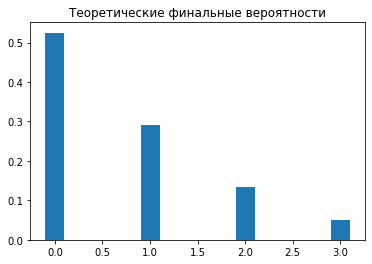

+---------------------------------------------+------------------------+
|                Характеристика               | Теоретическое значение |
+---------------------------------------------+------------------------+
|      Абсолютная пропускная способность      |   1.899513776337115    |
|     Относитальная пропускная способность    |   0.9497568881685575   |
|              Вероятность отказа             |  0.050243111831442464  |
|       Вероятность образования очереди       |  0.42463533225283623   |
|        Среднее число элементов в СМО        |   0.7082658022690436   |
|      Среднее число элементов в очереди      |  0.23338735818476497   |
|   Среднее время пребывания элемента в СМО   |   0.3541329011345218   |
| Среднее время пребывания элемента в очереди |  0.11669367909238249   |
+---------------------------------------------+------------------------+


In [6]:
t = Task(X, k, X2)

final_probabilities_info = pt.PrettyTable()
final_probabilities_info.add_column("Теоретические финальные вероятности", t.get_final_probabilities())
print(final_probabilities_info)

plot_histogram(t.get_final_probabilities())

info = pt.PrettyTable()
info.field_names = ["Характеристика", "Теоретическое значение"]
info.add_row(["Абсолютная пропускная способность", t.get_absolute_capacity()])
info.add_row(["Относитальная пропускная способность", t.get_relative_capacity()])
info.add_row(["Вероятность отказа", t.get_reject_probability()])
info.add_row(["Вероятность образования очереди", t.get_queue_probability()])
info.add_row(["Среднее число элементов в СМО", t.get_average_sys_size()])
info.add_row(["Среднее число элементов в очереди", t.get_average_queue_size()])
info.add_row(["Среднее время пребывания элемента в СМО", t.get_average_sys_time()])
info.add_row(["Среднее время пребывания элемента в очереди", t.get_average_queue_time()])
print(info)

### Создадим симуляционную модель СМО и сравним теоретические и эмпирические характеристики

In [7]:
class QueueSystem:
    def __init__(self, env, n, m, l, mu1, mu2):
        self.n = n
        self.m = m
        self.l = l
        self.mu1 = mu1
        self.mu2 = mu2

        self.counts = []
        self.times = []
        self.queue_counts = []
        self.queue_times = []

        self.serve_items = []
        self.reject_items = []

        self.env = env
        self.resources = sp.Resource(env, n)

    def serve(self):
        yield self.env.timeout(np.random.exponential(1 / ((1 / self.mu1 + 1 / self.mu2) ** -1)))

    def wait(self):
        yield self.env.timeout(100000)

    def get_workload(self):
        return self.resources.count

    def get_queue_len(self):
        return len(self.resources.queue)

    def start(self, action):
        while True:
            yield self.env.timeout(np.random.exponential(1 / self.l))
            self.env.process(action(self))
            

    def get_final_probabilities(self):
        items = np.array(self.reject_items + self.serve_items)
        return [(len(items[items == i]) / len(items)) for i in range(1, self.n + self.m + 2)]


    def get_queue_probability(self):
        items = np.array(self.reject_items + self.serve_items)
        return np.sum([(len(items[items == i]) / len(items)) for i in range(1, self.n + self.m + 2) if
                       i > self.n and i < self.n + self.m + 1])


    def get_reject_probability(self):
        items = np.array(self.reject_items + self.serve_items)
        return (len(items[items == self.n + self.m + 1]) / len(items))


    def get_relative_capacity(self):
        return 1 - self.get_reject_probability()


    def get_absolute_capacity(self):
        return self.get_relative_capacity() * self.l


    def get_average_queue_size(self):
        return st.mean(self.queue_counts)


    def get_average_sys_size(self):
        return st.mean(self.counts)


    def get_average_queue_time(self):
        return st.mean(self.queue_times)


    def get_average_sys_time(self):
        return st.mean(self.times)

In [8]:
def serve(queue_system: QueueSystem):
    queue_len = queue_system.get_queue_len()
    qn_count = queue_system.get_workload()
    with queue_system.resources.request() as request:
        queue_current_len = queue_system.get_queue_len()
        qn_current_count = queue_system.get_workload()
        queue_system.queue_counts.append(queue_len)
        queue_system.counts.append(queue_len + qn_count)
        if queue_current_len <= queue_system.m:
            start = queue_system.env.now
            response = yield request | queue_system.env.process(queue_system.wait())
            queue_system.queue_times.append(queue_system.env.now - start)
            if request in response:
                yield queue_system.env.process(queue_system.serve())
                queue_system.serve_items.append(queue_current_len + qn_current_count)
            else:
                queue_system.reject_items.append(queue_current_len + qn_current_count)
            queue_system.times.append(queue_system.env.now - start)
        else:
            queue_system.reject_items.append(queue_system.n + queue_system.m + 1)
            queue_system.times.append(0)
            queue_system.queue_times.append(0)

In [9]:
def plot_histograms(theoretical_probabilities, experimental_probabilities):
    theoretical_probabilities = np.array(theoretical_probabilities)
    experimental_probabilities = np.array(experimental_probabilities)
    
    plt.title('Теоретические финальные вероятности')
    plt.bar(range(len(theoretical_probabilities)), theoretical_probabilities, width = 0.2)
    plt.show()
    
    plt.title('Эмпирические финальные вероятности')
    plt.bar(range(len(experimental_probabilities)), experimental_probabilities, width = 0.2)
    plt.show()

    plt.title('Разница')
    plt.bar(range(len(theoretical_probabilities)), theoretical_probabilities - experimental_probabilities, width = 0.3)
    plt.axhline(y = 0, xmin = 0, xmax = len(theoretical_probabilities), color='red')
    plt.show()

In [10]:
def test_case(n, m, l, mu1, mu2, time, interval_count, _round):
    env = sp.Environment()
    queue_system = QueueSystem(env, n, m, l, mu1, mu2)
    env.process(queue_system.start(serve))
    env.run(until=time)

    final_probabilities_info = pt.PrettyTable()
    final_probabilities_info.add_column("Теоретические финальные вероятности", t.get_final_probabilities())
    final_probabilities_info.add_column("Эмпирические финальные вероятности", queue_system.get_final_probabilities())
    print(final_probabilities_info)

    plot_histograms(t.get_final_probabilities(), queue_system.get_final_probabilities())

    info = pt.PrettyTable()
    info.field_names = ["Характеристика", "Теоретическое значение", "Эмпирическое значение"]
    info.add_row(["Абсолютная пропускная способность", t.get_absolute_capacity(), queue_system.get_absolute_capacity()])
    info.add_row(["Относитальная пропускная способность", t.get_relative_capacity(), queue_system.get_relative_capacity()])
    info.add_row(["Вероятность отказа", t.get_reject_probability(), queue_system.get_reject_probability()])
    info.add_row(["Вероятность образования очереди", t.get_queue_probability(), queue_system.get_queue_probability()])
    info.add_row(["Среднее число элементов в СМО", t.get_average_sys_size(), queue_system.get_average_sys_size()])
    info.add_row(["Среднее число элементов в очереди", t.get_average_queue_size(), queue_system.get_average_queue_size()])
    info.add_row(["Среднее время пребывания элемента в СМО", t.get_average_sys_time(), queue_system.get_average_sys_time()])
    info.add_row(["Среднее время пребывания элемента в очереди", t.get_average_queue_time(), queue_system.get_average_queue_time()])
    print(info)
    


Вычислим основные характеристики СМО и сравним теоретические значения с эмпирическими

+-------------------------------------+------------------------------------+
| Теоретические финальные вероятности | Эмпирические финальные вероятности |
+-------------------------------------+------------------------------------+
|          0.5251215559157212         |         0.522928870292887          |
|          0.2917341977309562         |         0.2667782426778243         |
|         0.13290113452188004         |         0.1389958158995816         |
|         0.050243111831442464        |        0.07129707112970711         |
+-------------------------------------+------------------------------------+


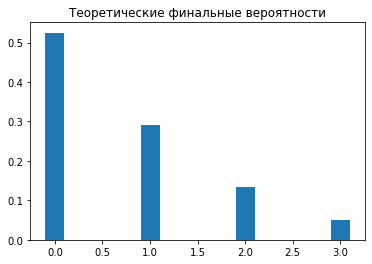

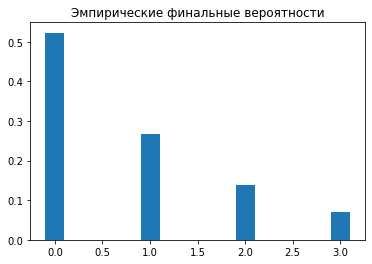

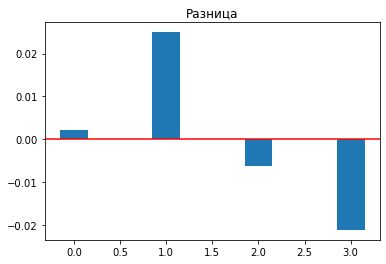

+---------------------------------------------+------------------------+-----------------------+
|                Характеристика               | Теоретическое значение | Эмпирическое значение |
+---------------------------------------------+------------------------+-----------------------+
|      Абсолютная пропускная способность      |   1.899513776337115    |   1.8574058577405859  |
|     Относитальная пропускная способность    |   0.9497568881685575   |   0.9287029288702929  |
|              Вероятность отказа             |  0.050243111831442464  |  0.07129707112970711  |
|       Вероятность образования очереди       |  0.42463533225283623   |   0.4057740585774059  |
|        Среднее число элементов в СМО        |   0.7082658022690436   |   0.7586610878661088  |
|      Среднее число элементов в очереди      |  0.23338735818476497   |   0.2815899581589958  |
|   Среднее время пребывания элемента в СМО   |   0.3541329011345218   |  0.37808864702488115  |
| Среднее время пребывания эле

In [13]:
test_case(1, 2, X, k, X2, 6000, 100, 10)